In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

In [2]:
month_dict = {
    1 : 'Januar',
    2 : 'Februar',
    3 : 'Marts',
    4 : 'April',
    5 : 'Maj',
    6 : 'Juni',
    7 : 'Juli',
    8 : 'August',
    9 : 'September',
    10 : 'Oktober',
    11 : 'November',
    12 : 'December'
}

In [3]:
url = 'https://www.dmi.dk/dmidk_obsWS/rest/archive/hourly/danmark/wind/Esbjerg/{year}/{month}/{day}'

In [4]:
wind = pd.DataFrame()
for year in [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]:
    for month in range (1, 13):
        for day in range (1, 32):

            try:
                r = requests.get(url.format(year=year, month=month_dict[month], day=day))
                d = r.json()
                df = pd.DataFrame.from_dict(d[0]['dataserie'])[['dateLocalString', 'value']]
                wind = pd.concat([wind, df], join='outer', axis=0)
            except:
                pass

In [5]:
wind

,dateLocalString,value
0,01-01-2011 00:00,11.577411
1,01-01-2011 01:00,11.451591
2,01-01-2011 02:00,11.136399
3,01-01-2011 03:00,11.001150
4,01-01-2011 04:00,9.730427
5,01-01-2011 05:00,10.938938
6,01-01-2011 06:00,11.555018
7,01-01-2011 07:00,10.941977
8,01-01-2011 08:00,10.765740
9,01-01-2011 09:00,10.301310


In [6]:
wind.rename(columns={'dateLocalString': 'time', 'value' : 'wind'}, inplace=True)

In [7]:
wind.set_index('time', inplace=True)

In [8]:
wind.index = pd.to_datetime(wind.index, format='%d-%m-%Y %H:%M')

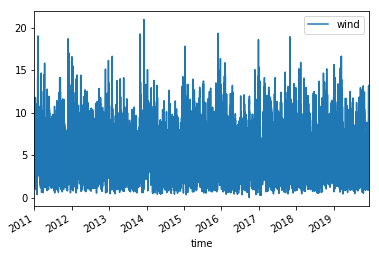

In [9]:
wind.plot()

In [10]:
wind.to_pickle('data/wind.pkl')

In [11]:
url = 'https://www.dmi.dk/dmidk_obsWS/rest/archive/hourly/danmark/sunhours/Odense/{year}/{month}/{day}'

In [12]:
sun = pd.DataFrame()
for year in [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]:
    for month in range (1, 13):
        for day in range (1, 32):

            try:
                r = requests.get(url.format(year=year, month=month_dict[month], day=day))
                d = r.json()
                df = pd.DataFrame.from_dict(d['dataserie'])[['dateLocalString', 'value']]
                sun = pd.concat([sun, df], join='outer', axis=0)
            except:
                pass

In [13]:
sun.rename(columns={'dateLocalString': 'time', 'value' : 'sun'}, inplace=True)
sun.set_index('time', inplace=True)
sun.index = pd.to_datetime(sun.index, format='%d-%m-%Y %H:%M')

In [16]:
sun.to_pickle('data/sun.pkl')

In [17]:
url = 'https://www.dmi.dk/dmidk_obsWS/rest/archive/hourly/danmark/temperature/Odense/{year}/{month}/{day}'

In [18]:
temp = pd.DataFrame()
for year in [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]:
    for month in range (1, 13):
        for day in range (1, 32):

            try:
                r = requests.get(url.format(year=year, month=month_dict[month], day=day))
                d = r.json()
                df = pd.DataFrame.from_dict(d[0]['dataserie'])[['dateLocalString', 'value']]
                temp = pd.concat([temp, df], join='outer', axis=0)
            except:
                pass

In [19]:
temp.rename(columns={'dateLocalString': 'time', 'value' : 'wind'}, inplace=True)
temp.set_index('time', inplace=True)
temp.index = pd.to_datetime(temp.index, format='%d-%m-%Y %H:%M')

In [20]:
temp.to_pickle('data/temp.pkl')

In [21]:
r = requests.get(url.format(year=2019, month=month_dict[1], day=1))
d = r.json()

In [22]:
d[0]['dataserie']

[{'time': 1546297200000,
  'value': 7.593215465545654,
  'normal': None,
  'parameterNumber': 101,
  'valuesUsed': 0,
  'timezone': 'Europe/Copenhagen',
  'valueRounded2OneDecimal': 7.6,
  'valueOneDecimal': '7,6',
  'dateLocalString': '01-01-2019 00:00',
  'yearLocalString': '2019',
  'monthString': 'Dec',
  'monthLocalString': 'Jan',
  'dayString': '31',
  'dayLocalString': '1',
  'hourString': '23',
  'hourLocalString': '00',
  'yearString': '2019',
  'dateString': '31-12-2018 23:00'},
 {'time': 1546300800000,
  'value': 7.786343574523926,
  'normal': None,
  'parameterNumber': 101,
  'valuesUsed': 0,
  'timezone': 'Europe/Copenhagen',
  'valueRounded2OneDecimal': 7.8,
  'valueOneDecimal': '7,8',
  'dateLocalString': '01-01-2019 01:00',
  'yearLocalString': '2019',
  'monthString': 'Jan',
  'monthLocalString': 'Jan',
  'dayString': '1',
  'dayLocalString': '1',
  'hourString': '00',
  'hourLocalString': '01',
  'yearString': '2019',
  'dateString': '01-01-2019 00:00'},
 {'time': 154